In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tables import *


In [71]:

image_height=12
image_width=120
image_shape=(image_height,image_width)
datafilename='PCA_challenge_for_Jan Jager.hdf5'

# Read PCA dataset
ImagesFileB = open_file('dataset/B_challenge_for_Amir.hdf5', mode = "r")
ImagesFileA = open_file('dataset/A_challenge_for_Amir.hdf5', mode = "r")

ImagesTableA=ImagesFileA.root.Images.Images
ImagesTableB=ImagesFileB.root.Images.Images



In [72]:
ImagesTableA.shape*1

(3000,)

In [73]:
newA = np.zeros((3000, 12*120))
for i in range(3000):
    newA[i] = ImagesTableA[i][1].flatten()
newB = np.zeros((3000, 12*22))
for i in range(3000):
    newB[i] = ImagesTableB[i][1].flatten()

In [74]:
length = ImagesTableA[1][1].shape[1]*ImagesTableA[1][1].shape[0]
new_arrayA = np.zeros((3000, length))

length = ImagesTableB[1][1].shape[1]*ImagesTableB[1][1].shape[0]
new_arrayB = np.zeros((3000, length))

In [75]:
i=0
for unflattened_array in ImagesTableA.iterrows():
  new_arrayA[i] = unflattened_array['image'].flatten()
  i=i+1

i=0
for unflattened_array in ImagesTableB.iterrows():
  new_arrayB[i] = unflattened_array['image'].flatten()
  i=i+1

In [76]:
new_arrayA.shape
new_arrayB.shape

(3000, 264)

In [77]:
from sklearn.decomposition import PCA , FastICA

In [78]:
pca = PCA(n_components = 10)
data_PCA = pca.fit(new_arrayA)

In [79]:
Ica = FastICA(n_components = 10)
data_ICA = Ica.fit(new_arrayB)


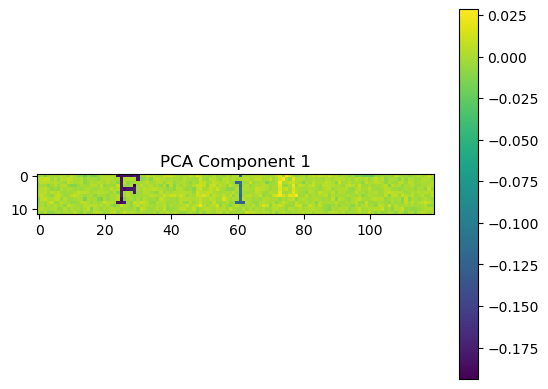

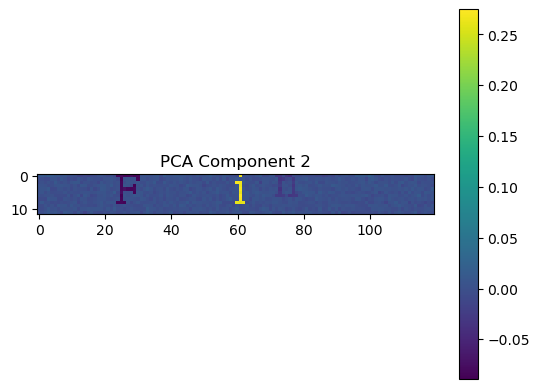

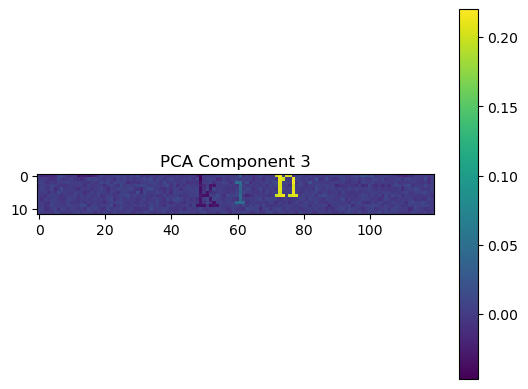

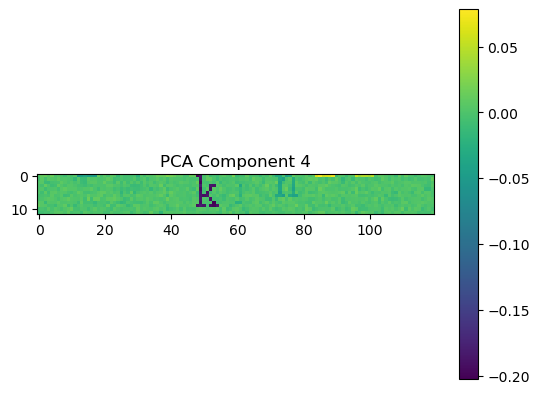

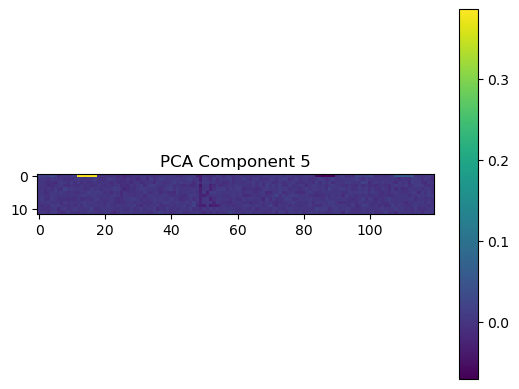

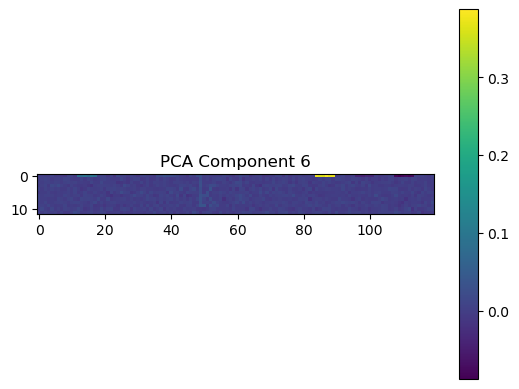

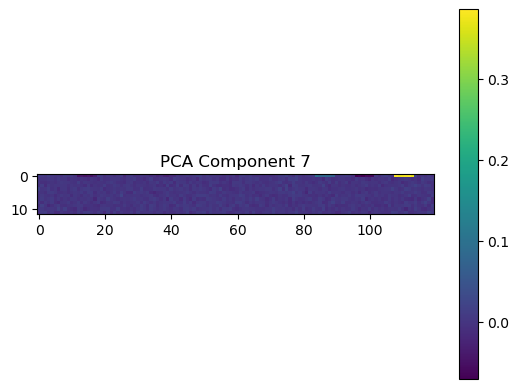

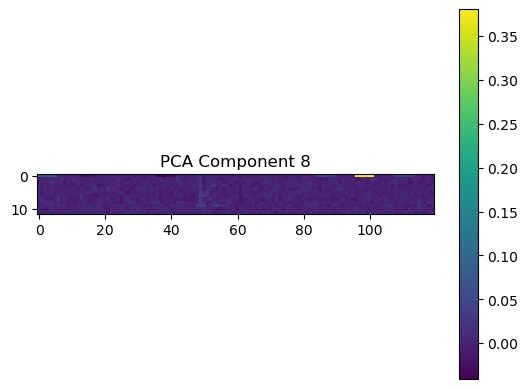

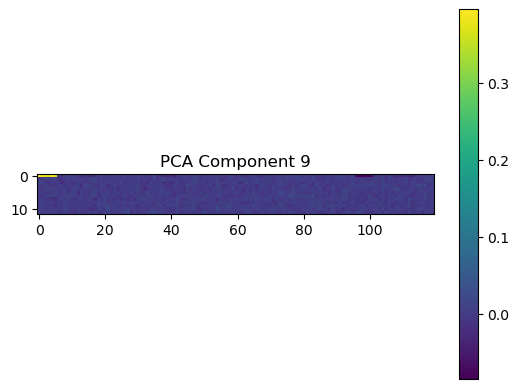

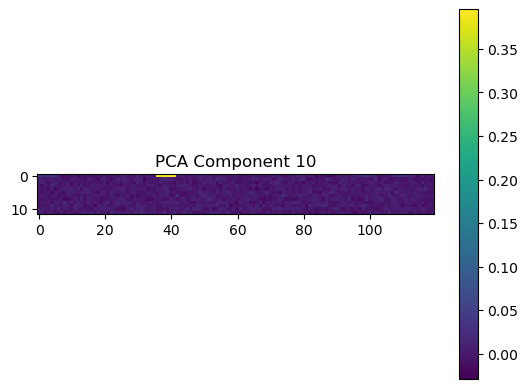

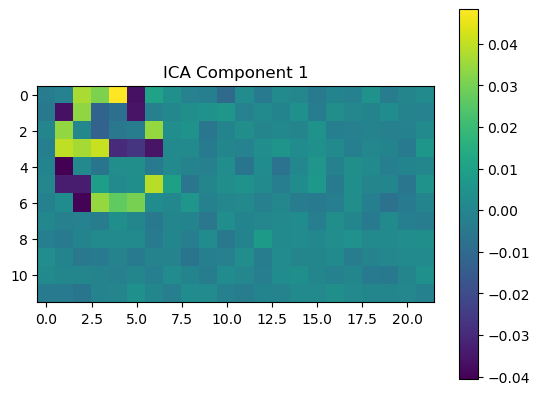

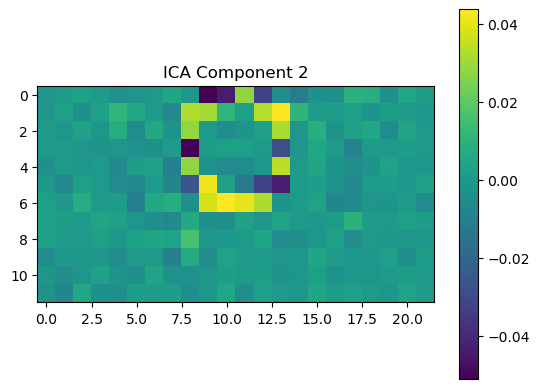

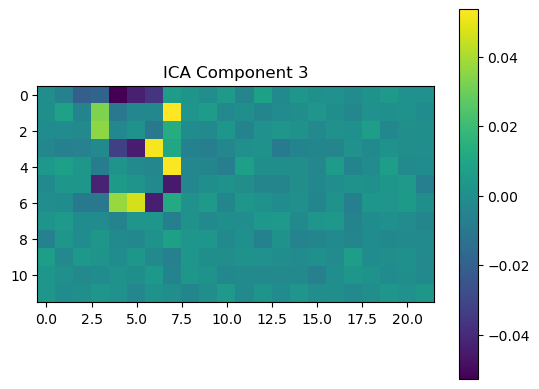

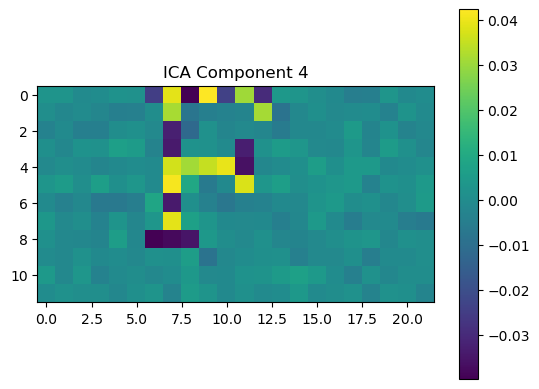

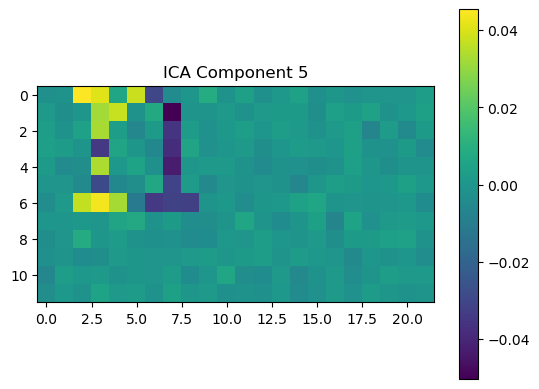

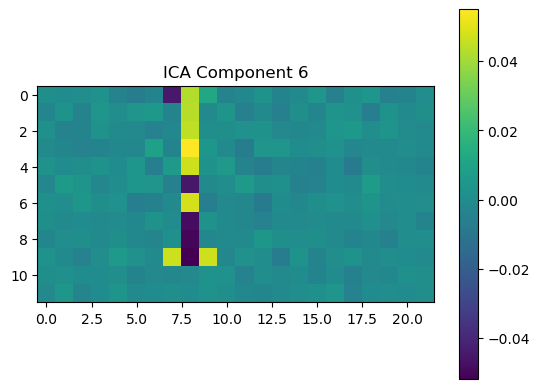

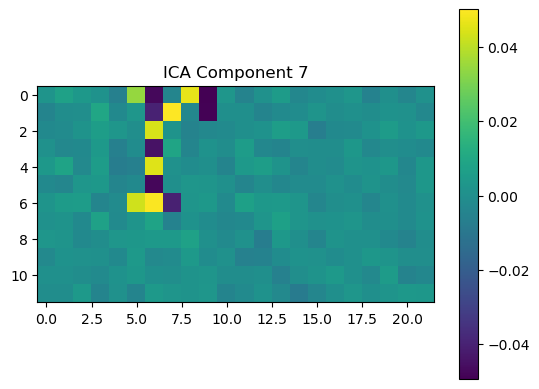

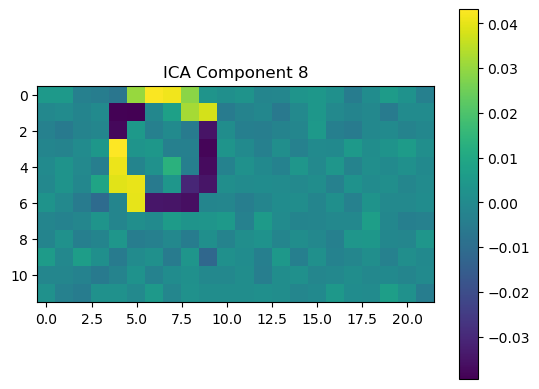

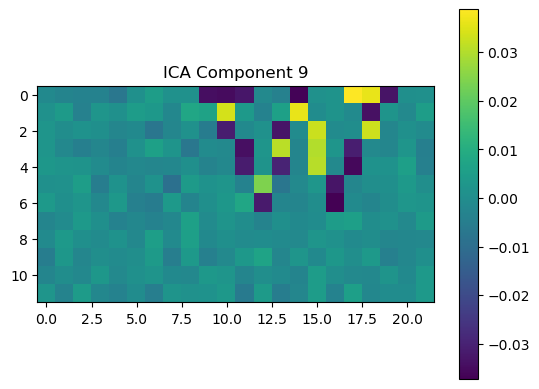

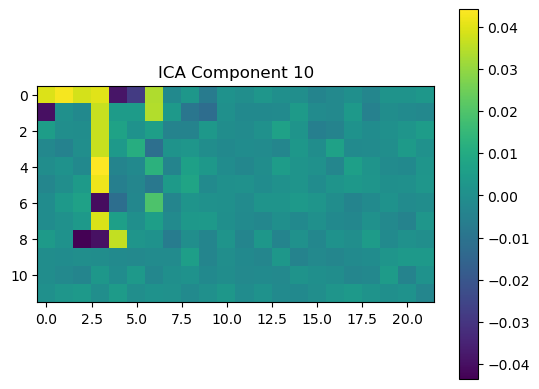

In [80]:
for i in range(10):
    plt.imshow(data_PCA.components_[i].reshape((ImagesTableA[1][1].shape[0], ImagesTableA[1][1].shape[1])))
    plt.title(f'PCA Component {i+1}')
    plt.colorbar()
    plt.show()


for i in range(10):
    plt.imshow(data_ICA.components_[i].reshape((ImagesTableB[1][1].shape[0], ImagesTableB[1][1].shape[1])))
    plt.title(f'ICA Component {i+1}')
    plt.colorbar()
    plt.show()


 